<a href="https://colab.research.google.com/github/pradyumn280899/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 7.5 MB/s 
     |████████████████████████████████| 6.3 MB 65.5 MB/s 
     |████████████████████████████████| 15.4 MB 40.9 MB/s 


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import point, polygon
from wordcloud import WordCloud
sns.set_style("whitegrid", {'grid.linestyle': ''})
sns.set(rc={'figure.figsize':(16.7,8.27)})
%matplotlib inline

**Aquaring and loading data**

Loading a data into appropriate format for analysis.






In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
working_path = '/content/drive/MyDrive/alma better/capstone project/EDA/'

In [66]:
df = pd.read_csv(working_path+'Airbnb NYC 2019.csv')
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [67]:
# Define the path where data is kept
df = pd.read_csv(working_path+'Airbnb NYC 2019.csv')
sns.set(rc={'figure.figsize':(16.7,8.27)})
plt.rcParams['figure.figsize'] = [16.7,8.27]

In [68]:
df_with_na = df.copy()

In [80]:
# checking basic information about dataset like number of columns and rows, data type total number of nullll value. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**After loading dataset and from looking of head and info of data. we can see number of things.**

---
1. NaN value
2. most number of NaN value present in last_review and 'review_per_month' column
3. dataset divided into numerical and catogorical datatype.
4. 48895 rows and 16 columns

we need to do data cleaning data and ir must tb handle NaN value before data exploration. 

**univariant analysis**

---

 **column No 1: Name** 

 This column contains the name(description) of the property which the host is giving on rent by which he can draw the customer's attention.






In [84]:
# geting the number of unique names from the name column
df.name.nunique()


47905

In [86]:
df.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

**Column No. 2 & 3 : host_id, host_name**

Observations

1. This column contains all the unique names of hosts. We observe in all 8214 different hosts names in this database.
2. By comparing the unique numbers of host and host ID it can be concluded that there are many hosts with the same name.
3. So we will use host id for all further analysis.

In [87]:
df.host_id

0            2787
1            2845
2            4632
3            4869
4            7192
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 48895, dtype: int64

In [88]:
# geting the number of unique id from the host_id column
df.host_id.nunique()

37457

This column contains all the unique id hosts there are a total of 21808 hosts in the database.

In [89]:
df.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

In [90]:
# geting the number of unique host name from the host_name column 
df.host_name.nunique()

11452

**Column No. 4 : neighbourhood_group**

we can see that most no of rooms are in manhattan followed by brooklyn and queens 

In [91]:
# geting unique neighborhood groups from the neighborhood_groups column 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


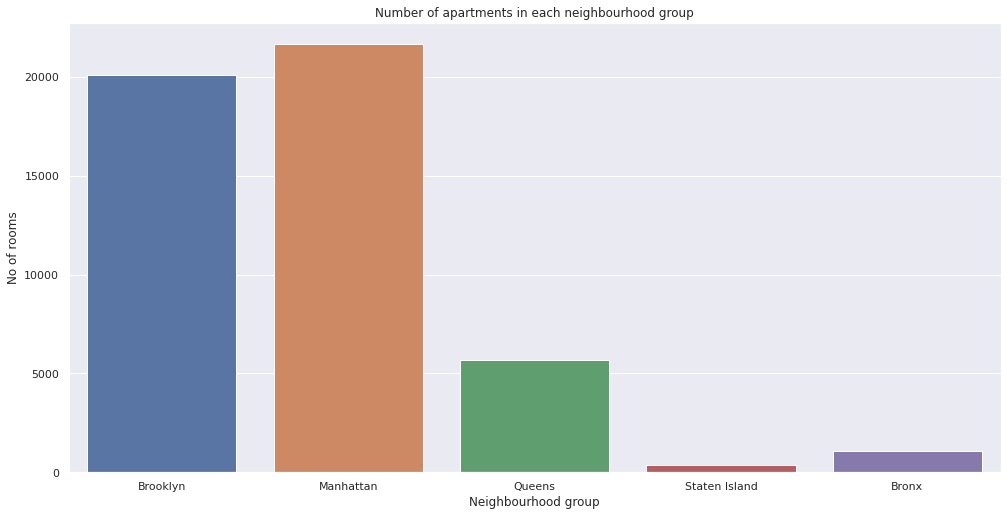

In [92]:
# creating a count plot
sns.countplot(df.neighbourhood_group).set_title('Number of apartments in each neighbourhood group')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')
plt.show()

**Column NO. 5 : neighbourhood**

**Their are a total of 219 unique neighbourhood area.**
1. Willamsburg, Bedford and Bushwick have most no of bookings in brooklyn neighbourhood_group
2. Harlem, Upper West Side and Hell's Kitchen have most no of bookings in manhattan neighbourhood_group
3. Astoria, Flushing and Long Island city have most no of bookings in Queens neighbourhood_group
4. Tompkinsville, St.George, Cancaord ave most no of bookings in Staten_Island neighbourhood_group
5. Bronx neighbourhood_group all the neighbourhood have almost equal no of bookings.

In [93]:
df.neighbourhood.nunique()

221

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


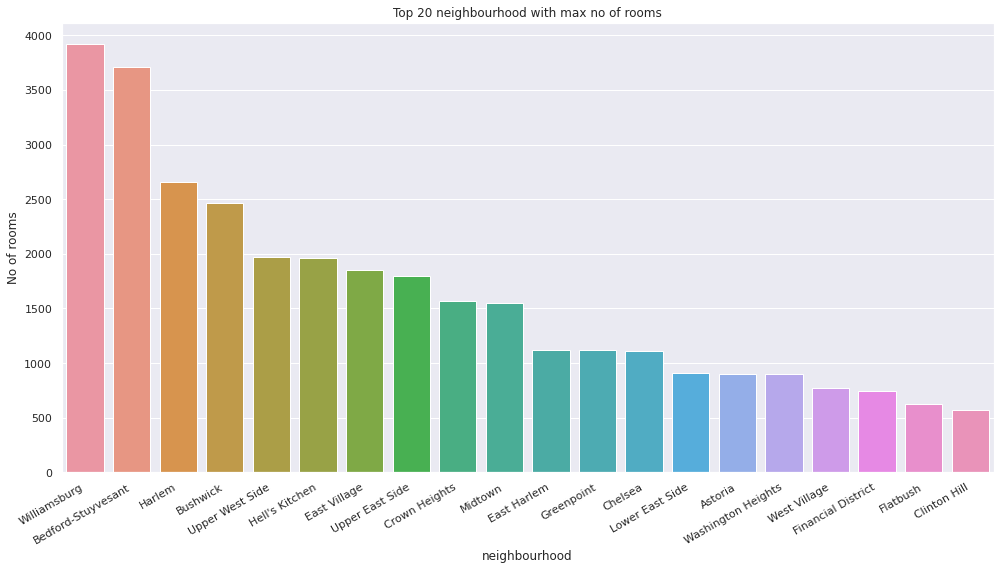

<Figure size 1202.4x595.44 with 0 Axes>

In [94]:
#creating a count plot
sns.countplot(df.neighbourhood, order = df.neighbourhood.value_counts().iloc[:20].index ).set_title('Top 20 neighbourhood with max no of rooms')
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.figure(figsize=(16.7,8.27)) 
plt.show()

In [95]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [96]:
#storing all the diffrent neighbourhood groups to diffrent data frames 
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']
Queens_group_df=df.loc[df['neighbourhood_group']== 'Queens']
Staten_Island_group_df=df.loc[df['neighbourhood_group']== 'Staten Island']
Bronx_group_df=df.loc[df['neighbourhood_group']== 'Bronx']

Text(0.5, 0, 'No of rooms')

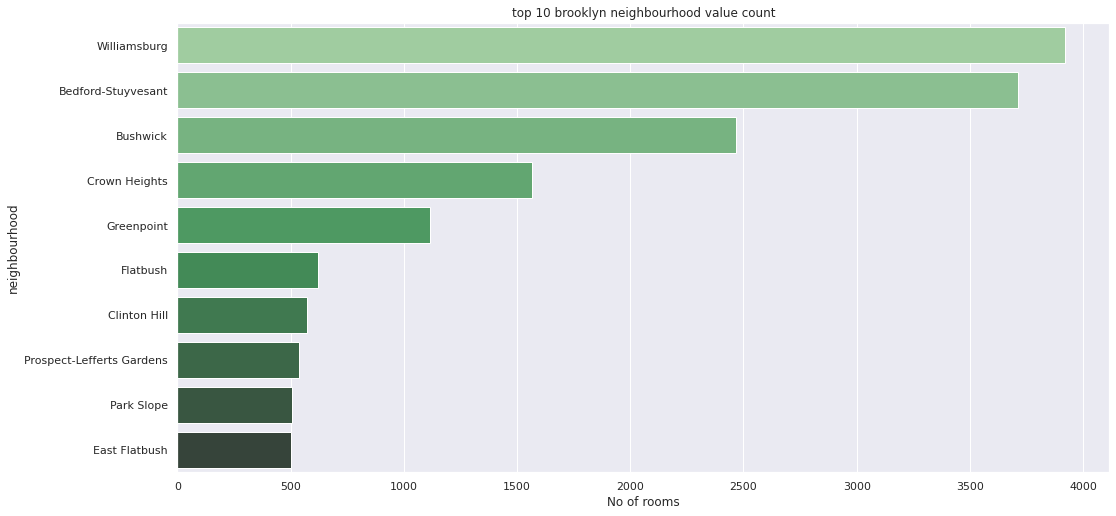

In [97]:
# top 10 areas in brooklyn with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=brooklyn_group_df, palette="Greens_d",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

Text(0.5, 0, 'No of rooms')

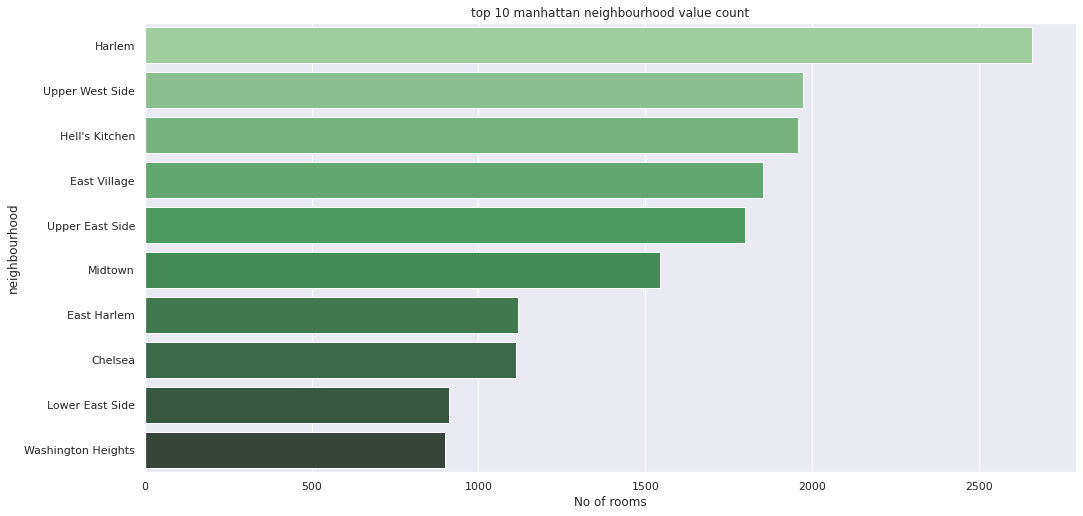

In [98]:
# top 10 areas in manhattan with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=manhattan_group_df, palette="Greens_d",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

Text(0.5, 0, 'No of rooms')

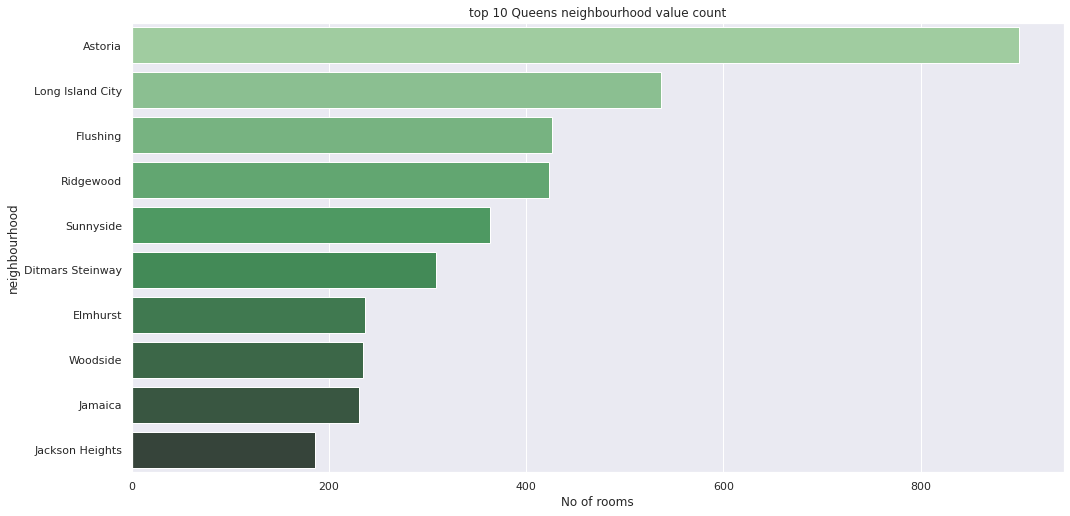

In [99]:
# top 10 areas in Queens with most booking
#creating a count plot

sns.countplot(y="neighbourhood", data=Queens_group_df, palette="Greens_d",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

Text(0.5, 0, 'No of rooms')

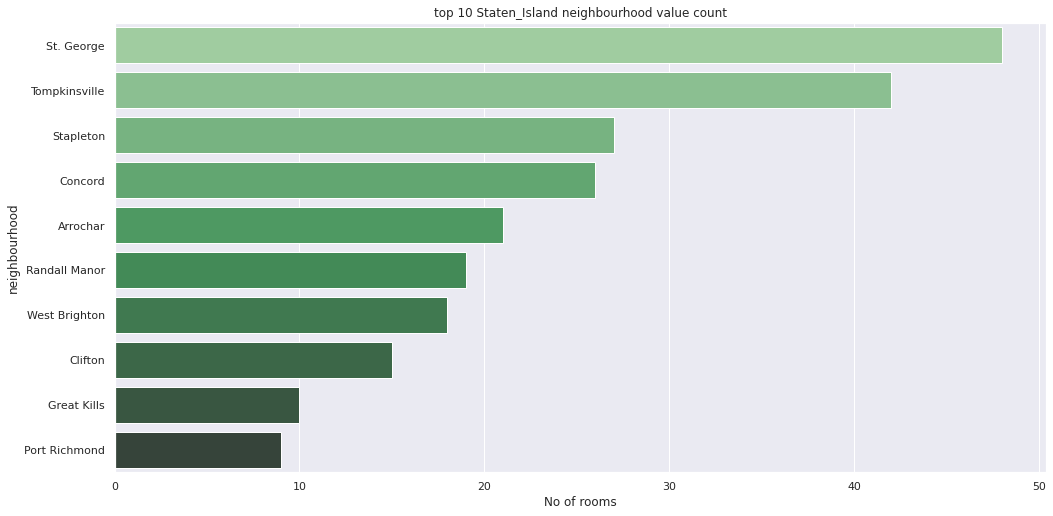

In [100]:
# top 10 areas in Staten_Island with most booking
#creating a count plot

sns.countplot(y="neighbourhood", data=Staten_Island_group_df, palette="Greens_d",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('No of rooms')    

Text(0.5, 0, 'No of rooms')

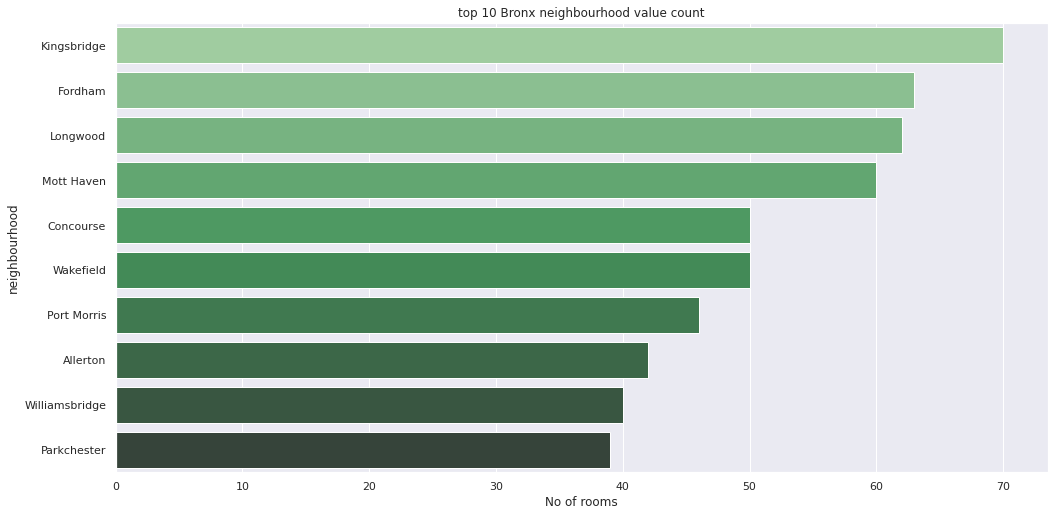

In [102]:
#top 10 areas in Staten_Island with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('No of rooms')     

Text(0.5, 1.0, 'top 10 Bronx neighbourhood value count')

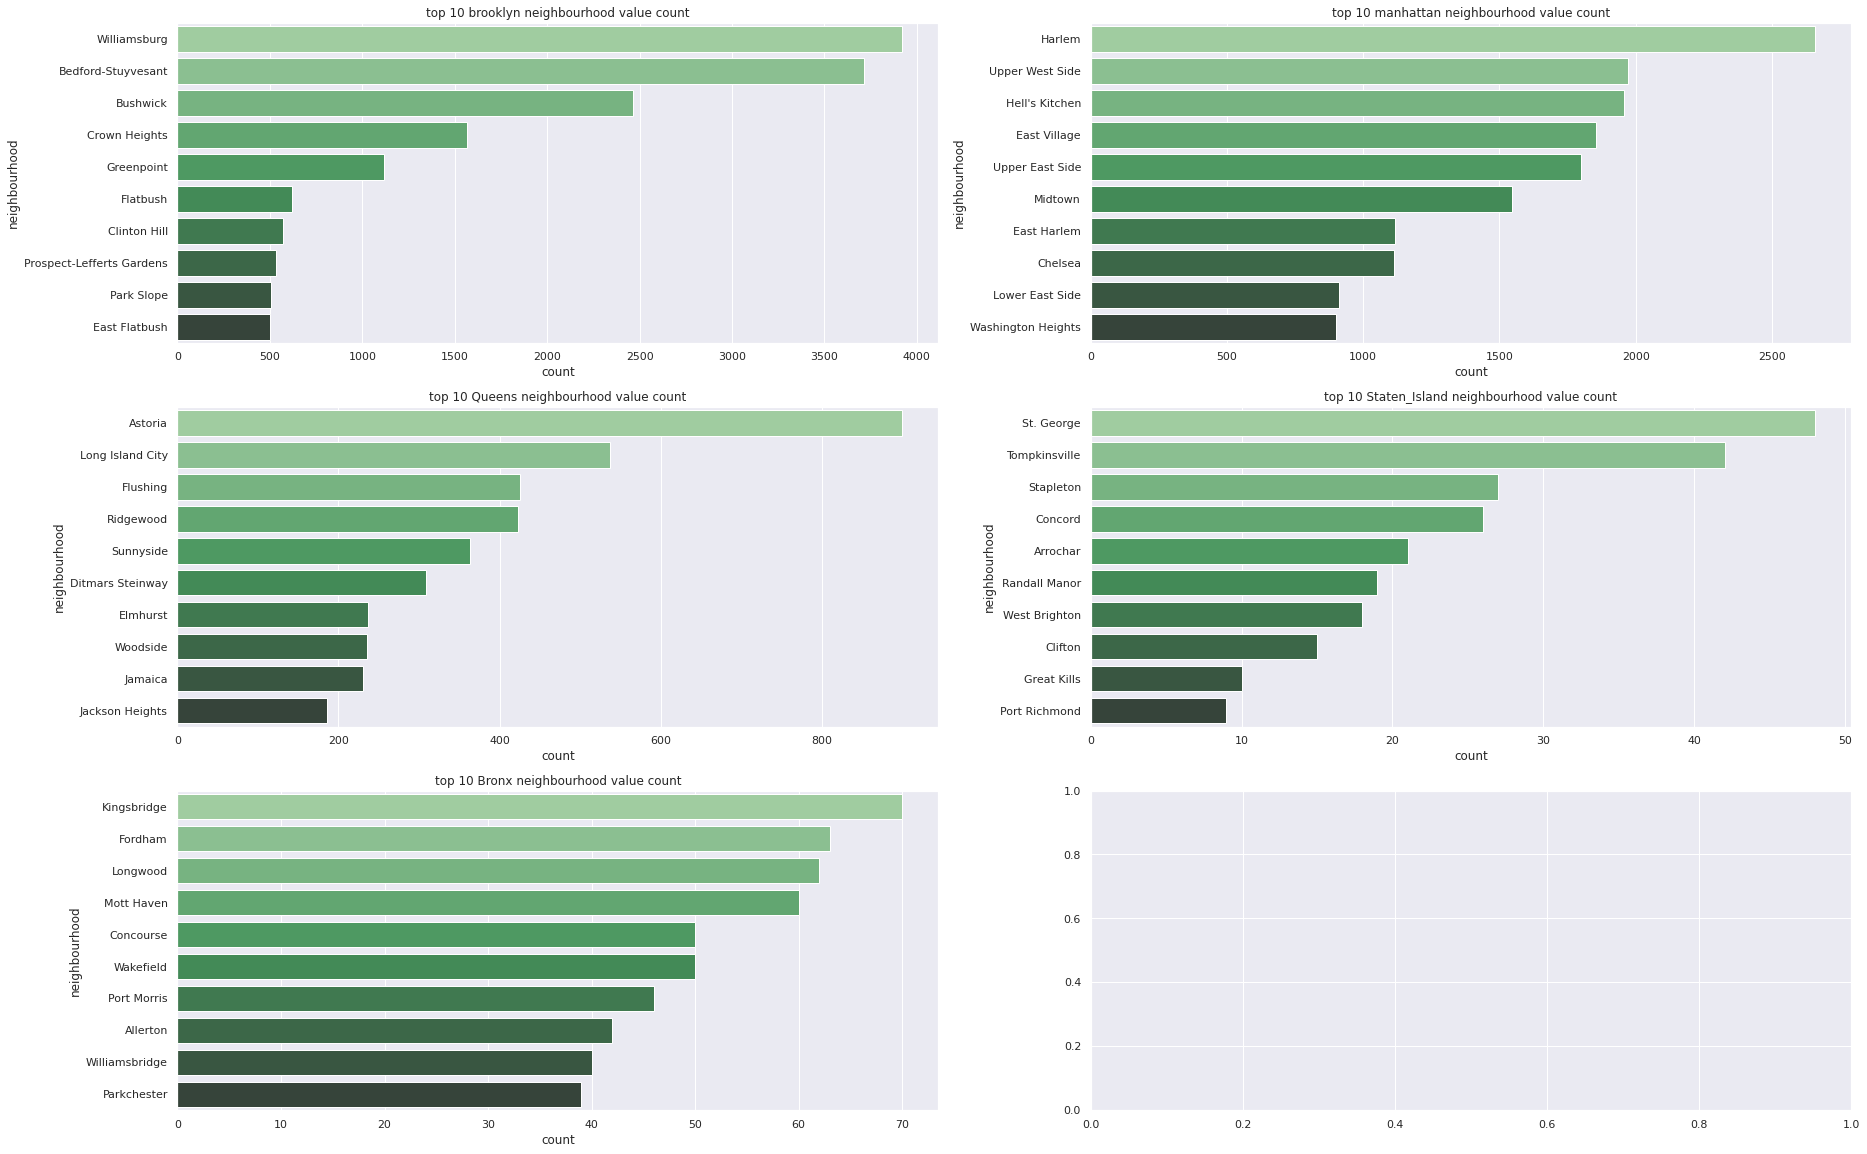

In [103]:
# creating subplots to plot all the graphs together 
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],y="neighbourhood", data=brooklyn_group_df, palette="Greens_d",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')
              
sns.countplot(ax=axes[0,1],y="neighbourhood", data=manhattan_group_df, palette="Greens_d",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')

sns.countplot(ax=axes[1,0],y="neighbourhood", data=Queens_group_df, palette="Greens_d",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')

sns.countplot(ax=axes[1,1],y="neighbourhood", data=Staten_Island_group_df, palette="Greens_d",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

sns.countplot(ax=axes[2,0],y="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')

Observations

1. willamsburg, bedford and bushwick have most no of bookings in brooklyn neighbourhood_group
2. Harlem, Upper West Side and Hell's Kitchen have most no of bookings in manhattan neighbourhood_group
3. astoria, flushing and long island city have most no of bookings in Queens neighbourhood_group
4. tompkinsville, St.George, cancaord ave most no of bookings in Staten_Island neighbourhood_group
5. in bronx neighbourhood_group all the neighbourhood have almost equal no of bookings

**Column NO. 6 & 7 : latitude & longitude**

In [104]:
df.latitude.describe()

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

In [105]:
df.longitude.describe()

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

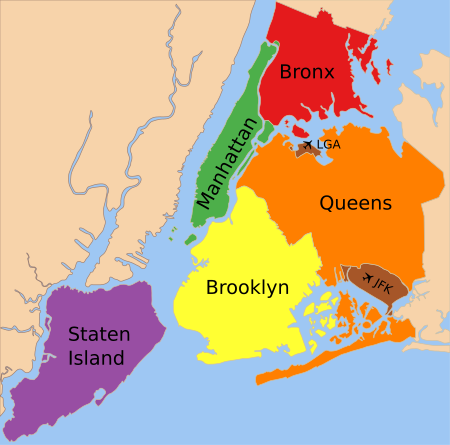

Text(0.5, 1.0, 'Density of rooms')

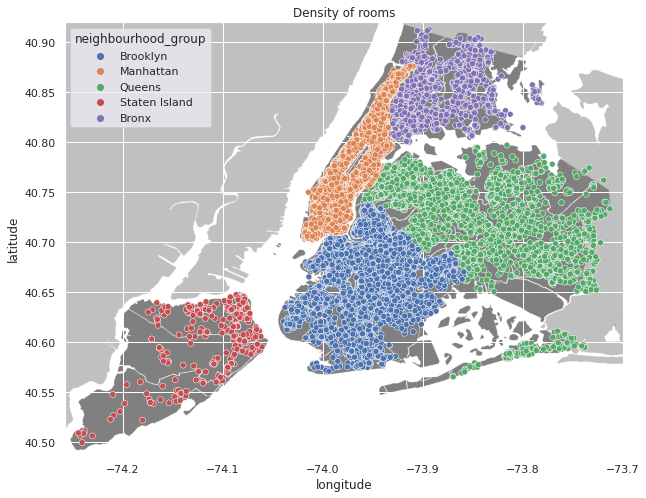

In [106]:
data = df[["latitude","longitude",'neighbourhood_group']]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
#creating an scaterplot
sns.scatterplot(data = data,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of rooms')

**Column NO. 8 : Room Type**
1. Customer prefer entire home/apt or private room. only very few customer prefer to book shared rooms.



Text(0.5, 0, 'Type of rooms')

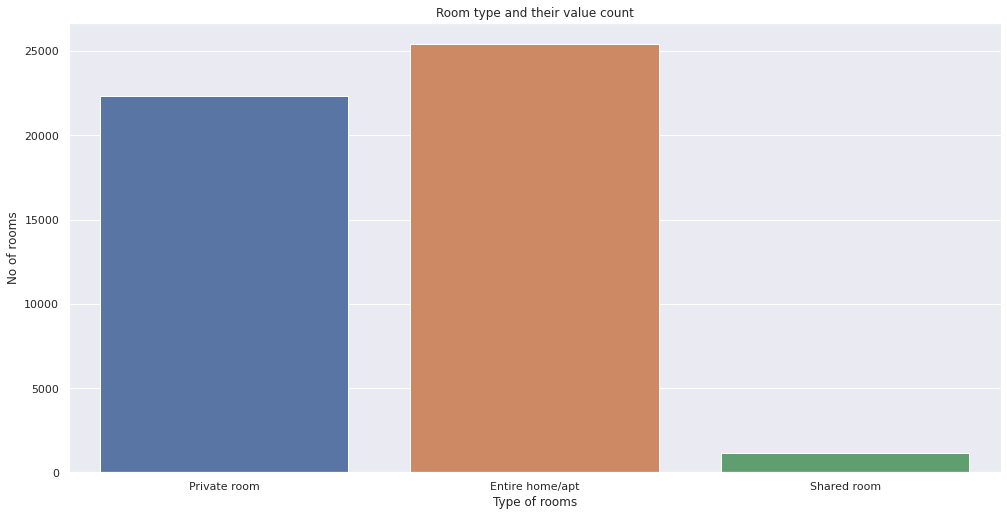

In [107]:
#creating a count plot
sns.countplot(x=df['room_type']).set_title('Room type and their value count')
#adding x and y labels to the plot
plt.ylabel('No of rooms') 
plt.xlabel('Type of rooms')

**Column NO. 9 : price**
1. people prefer the romms in range of 50 to 200

2. mean and median of price for the data set with outliers are 162 and 112

3. mean and median of price for the data set with outliers are 146 and 110

Text(0, 0.5, 'No of rooms')

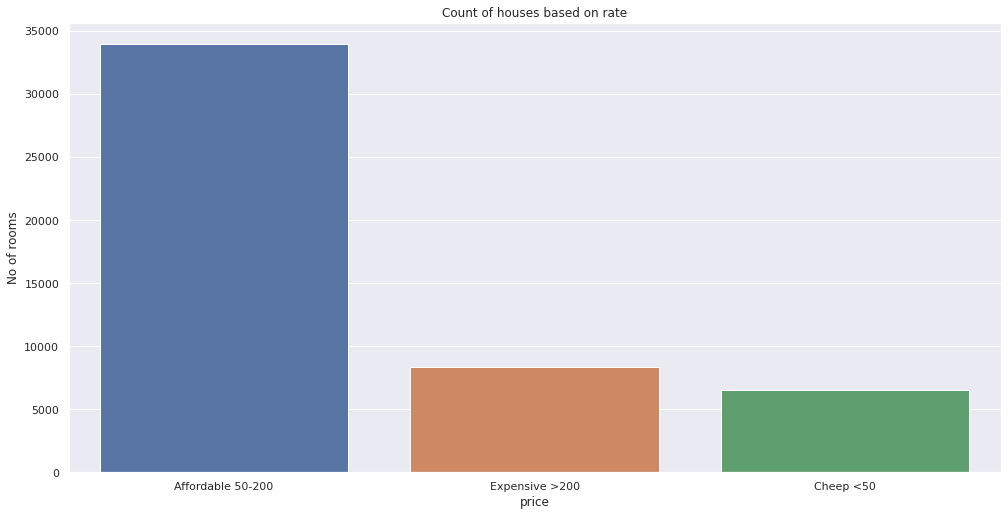

In [108]:
'''
dividing price range in 3 groups 
1) cheep i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep <50'
  elif price>=50 and price<=200:
    return 'Affordable 50-200'
  else:
    return 'Expensive >200'
#creating a count plot 
sns.countplot(x=df.price.apply(price_catagory)).set_title('Count of houses based on rate')
#adding y label to the plot
plt.ylabel('No of rooms')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


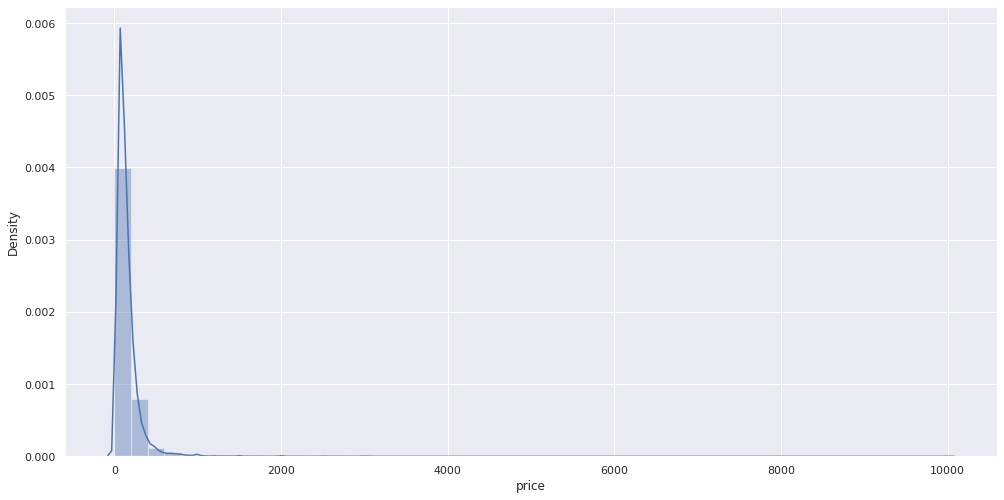

In [109]:
sns.distplot(df.price)

**Column NO. 10 : minimum_nights**

1. The graph is a right screwed (positive skewness).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

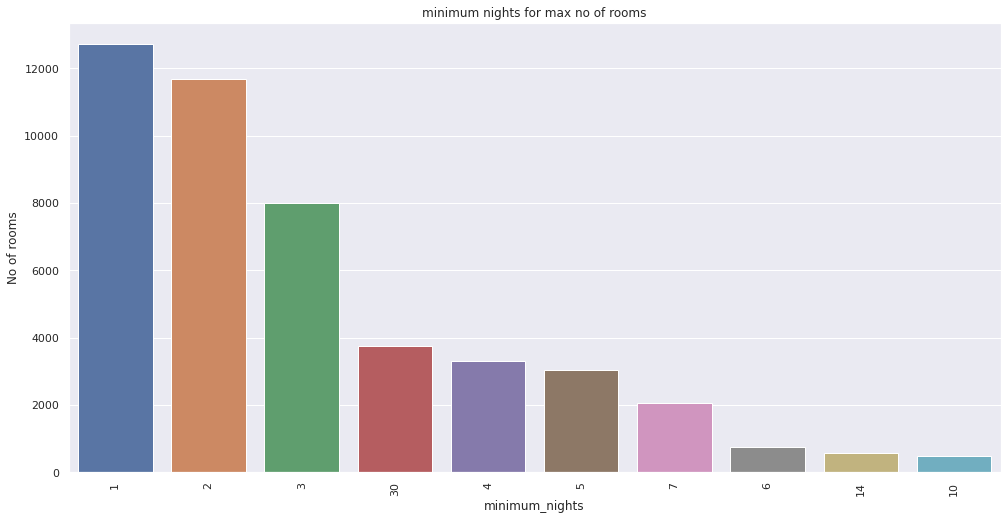

In [110]:
#creating a count plot 
sns.countplot(df.minimum_nights,order=df.minimum_nights.value_counts().iloc[:10].index).set_title('minimum nights for max no of rooms')
#rotating x lables 
plt.xticks(rotation=90)
#adding x and y labels to the plot
plt.ylabel('No of rooms')

This plots shows that majority of room booking are for 1 to 4 and then for 30 CHANGE Y AXIS NAME days

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'min nights density plot befor removeing outliers')

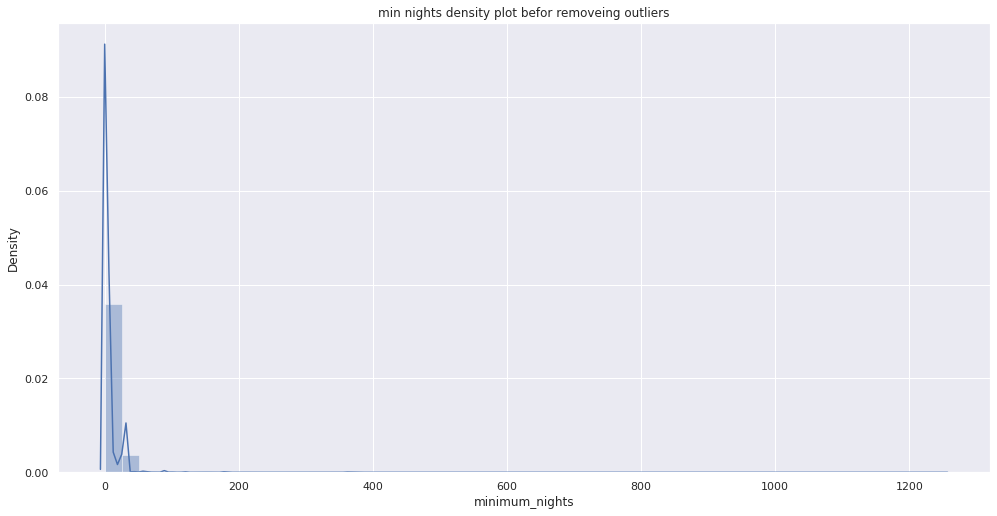

In [111]:
sns.distplot(df_with_na.minimum_nights).set_title('min nights density plot befor removeing outliers')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'min nights density plot after removeing outliers')

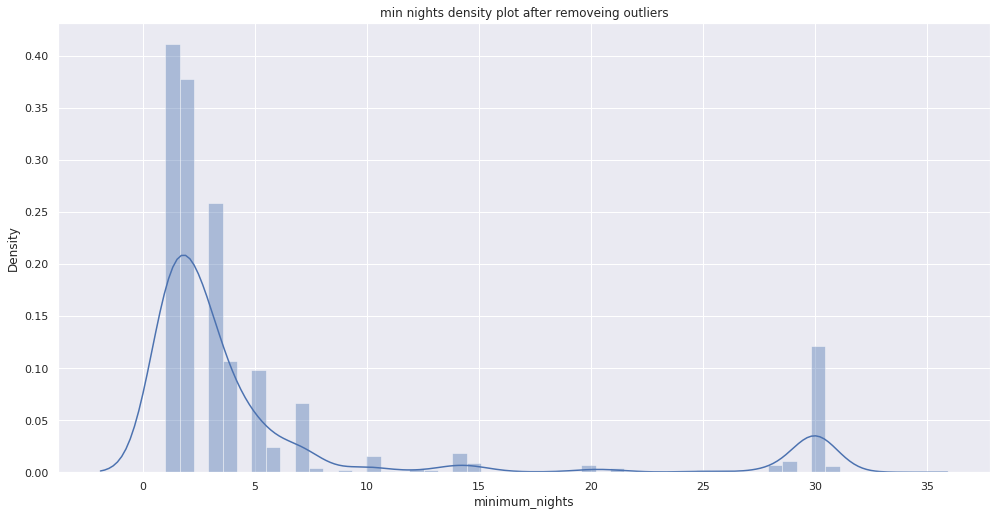

In [112]:
# subsetting the df with values of min night under 35
min_nights_df=df[df.minimum_nights<35]
#creating a distplot
sns.distplot(min_nights_df.minimum_nights).set_title('min nights density plot after removeing outliers')